*Import library's*

In [3]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from html.parser import HTMLParser
from bs4 import BeautifulSoup

*Twitter authentication*

In [4]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

*Twitter API Login*

In [5]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [191]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1059596637159518208,2018-11-06 00:01:39,b'@falanext Ent\xc3\xa3o voc\xc3\xaas renomeia...
1,1059589775898918917,2018-11-05 23:34:23,"b'RT @LollapaloozaBr: Pronto, agora todo mundo..."
2,1059583453530861568,2018-11-05 23:09:16,b'@falanext tao lindo mas com o atendimento ma...
3,1059583172772540422,2018-11-05 23:08:09,"b'@falanext Acabei de receber o cart\xc3\xa3o,..."
4,1059581698327932929,2018-11-05 23:02:17,b'Aquele sustinho feliz b\xc3\xa1sico quando s...
5,1059580367903055872,2018-11-05 22:57:00,b'@raphaelac_ @falanext Complicad\xc3\xadssimo'
6,1059577124397506560,2018-11-05 22:44:07,b'Dif\xc3\xadcil demais falar com a @falanext ...
7,1059572878411251712,2018-11-05 22:27:14,b'A\xc3\xad eu vou e fico mais uma hora na fil...
8,1059572409727176704,2018-11-05 22:25:23,"b'@falanext, meu nen\xc3\xa9m\nEu fui furtada ..."
9,1059569249956573184,2018-11-05 22:12:49,b'@falanext O @Uber_Brasil pra aceitar o cart\...


*Data Cleaning*

In [192]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8")
    except:
        clean = stripped
    letters_only = re.sub("[\W]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessary white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:500]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [193]:
data = pd.DataFrame(test_result, columns=['tweet_text'])
data

,tweet_text
0,então vocês renomeiam o sac de vocês pra poder...
1,rt pronto agora todo mundo pode garantir seu l...
2,tao lindo mas com o atendimento mais lixoso da...
3,acabei de receber o cartão obrigado gostei da ...
4,aquele sustinho feliz bã sico quando seu limit...
5,_ complicadíssimo
6,difícil demais falar com a viu tentei mensagem...
7,aí eu vou e fico mais uma hora na fila da dona...
8,meu neném eu fui furtada e preciso bloquear o ...
9,o _brasil pra aceitar o cartão de vcs toda vez...


*Stopwords in portuguese*

In [194]:
stopwords = nltk.corpus.stopwords.words('portuguese')

*Used words*

In [195]:
text = " ".join(tweet for tweet in data.tweet_text)

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

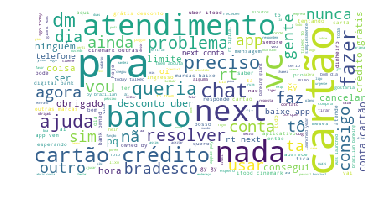

In [196]:
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Counting the words used in the WordCloud*

In [197]:
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 25116 words in the combination of all tweets.


*Counting the top 10 most used words*

*ReLi Lexicon - portuguese sentimental analysis*

In [198]:
base_path = 'C:/Users/Gabriela/Documents/GitHub/tcc/ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

*Read ReLi Lexicon file in directory*

In [199]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

*Tweets classification in positives and negatives*

In [200]:
dados = {}
orderedPrediction = []
for tweet in data.tweet_text:
   blob = tb(str(tweet), classifier=cl)
   if blob.sentences:
       for s in blob.sentences:
           orderedPrediction.append(s.classify())
   else:
       orderedPrediction.append('N/A')

Add 'sentiment' column in data frame

In [201]:
data['sentiment'] = orderedPrediction
data

,tweet_text,sentiment
0,então vocês renomeiam o sac de vocês pra poder...,pos
1,rt pronto agora todo mundo pode garantir seu l...,pos
2,tao lindo mas com o atendimento mais lixoso da...,pos
3,acabei de receber o cartão obrigado gostei da ...,pos
4,aquele sustinho feliz bã sico quando seu limit...,pos
5,_ complicadíssimo,pos
6,difícil demais falar com a viu tentei mensagem...,pos
7,aí eu vou e fico mais uma hora na fila da dona...,pos
8,meu neném eu fui furtada e preciso bloquear o ...,pos
9,o _brasil pra aceitar o cartão de vcs toda vez...,pos


*Counting positives and negatives*

In [202]:
df = data.groupby('sentiment').count()
df

,tweet_text
sentiment,
N/A,19
neg,82
pos,314


*Sentimental Analysis Graph based on Naive-Bayes Classification*

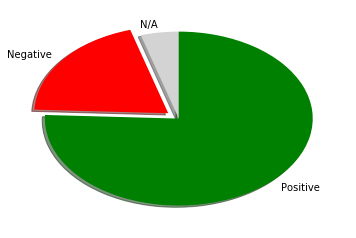

In [209]:
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']
pie_na = df.loc['N/A']

slices = [pie_na, pie_neg, pie_pos]
tweets = ['N/A', 'Negative', 'Positive']
columns = ['LightGrey', 'Red', 'Green']
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0, 0.1, 0))

# Incluir percentuais
 
plt.show()